In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('heart.csv')

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
x=df.drop('target', axis=1)
y=df['target']

In [9]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [11]:
x_train, x_test, y_train, y_test=train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

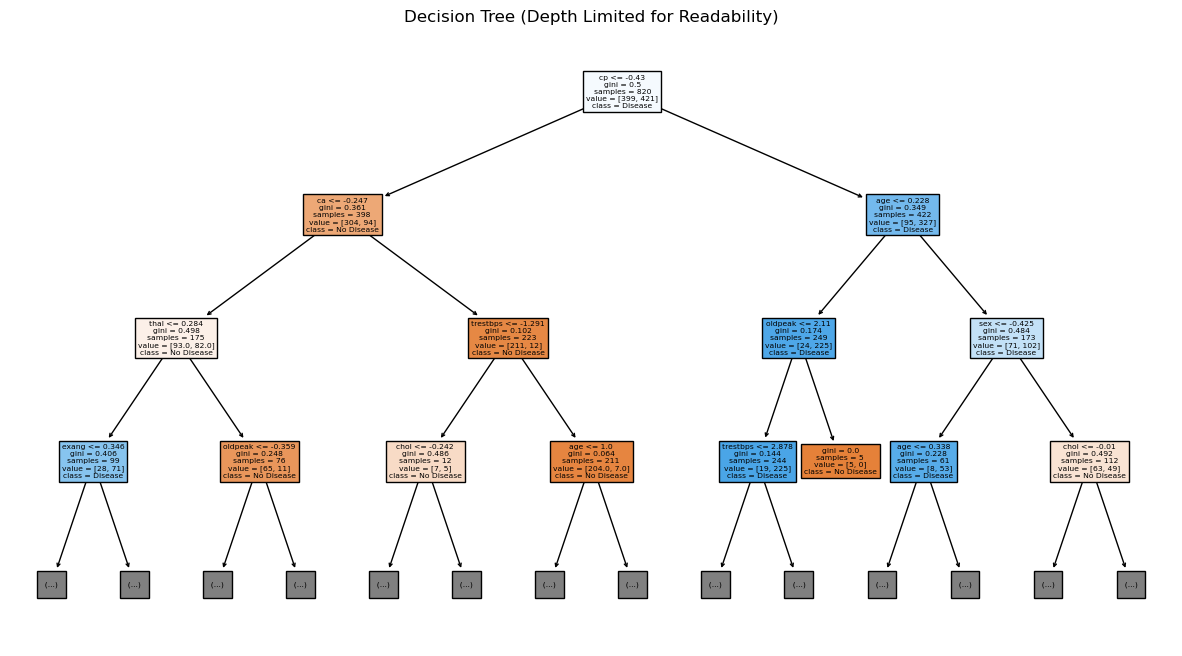

In [15]:
tree=DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
plt.figure(figsize=(15, 8))
plot_tree(tree, feature_names=df.columns[:-1], class_names=['No Disease', 'Disease'],
          filled=True, max_depth=3)  
plt.title("Decision Tree (Depth Limited for Readability)")
plt.show()

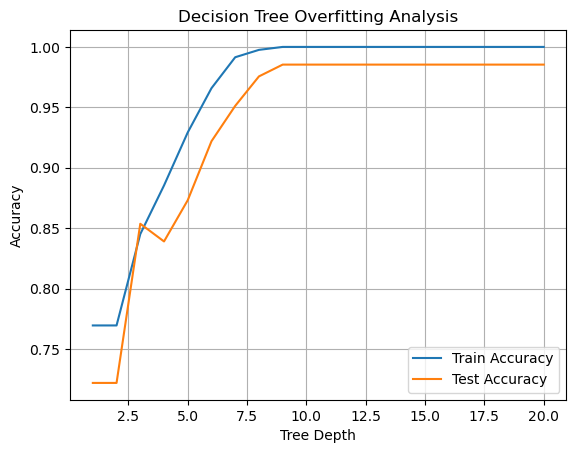

In [17]:
train_scores=[]
test_scores=[]
depth_range=range(1, 21)

for depth in depth_range:
    dt=DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    train_scores.append(dt.score(x_train, y_train))
    test_scores.append(dt.score(x_test, y_test))

plt.plot(depth_range, train_scores, label='Train Accuracy')
plt.plot(depth_range, test_scores, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Overfitting Analysis')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_pred=rf.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
tree_acc=accuracy_score(y_test, tree.predict(x_test))
rf_acc=accuracy_score(y_test, rf_pred)
print(f"Decision Tree Accuracy: {tree_acc:.3f}")
print(f"Random Forest Accuracy: {rf_acc:.3f}")

Decision Tree Accuracy: 0.985
Random Forest Accuracy: 1.000


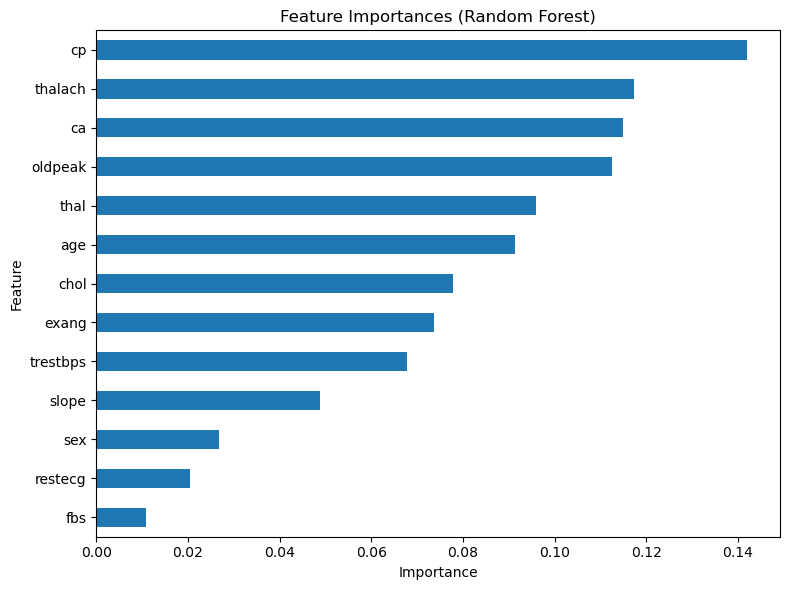

In [27]:
importances=pd.Series(rf.feature_importances_, index=df.columns[:-1])
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [29]:
rf_cv_scores=cross_val_score(rf, x_scaled, y, cv=5)
print(f"Random Forest CV Accuracy (5-fold): {rf_cv_scores.mean():.3f} ± {rf_cv_scores.std():.3f}")

Random Forest CV Accuracy (5-fold): 0.997 ± 0.006
